---  
Final Project for Computational Statistics | Summer 2022, M.Sc. Economics, University of Bonn | [Hyein Jeong](https://github.com/huiren-j)
# Comparison of Random Forest and Logistic Regression in Classification <a class= "tocSkip">
---

This jupyter notebook is based on data set up of the following paper:
>Bogan, V. L., & Fernandez, J. M. (2017). How children with mental disabilities affect household investment decisions. American Economic Review, 107(5), 536-40.

**Note** : To improve readibility, this notebook does not contain codes for plotting outcomes. The entire codes including plot is retained at ./src/codes.ipynb

**Abstract** This study examines the performance of parametric and non-parametric methods. Logistic regression is used as an example of parametric methods and random forest is selected as a non-parametric model for classification. The performance of each model is evaluated by three measurement: False Positive Rate, True Positive Rate and Area Under the ROC Curve. The simulation data is manipulated to produce 8 different test sample. Across samples, logistic regression outperformed random forest. As increase the number of sample size, the performance gap measured by FPR decreased. AUC shows dominant performance of logistic regression more obviously. The largest AUC values of random forest was smaller than least AUC value of logistic model. It might suggest that the well-known disadvantage of random forest which is not suitable for data satisfying parametric test.

<h1>Table of Contents<span class= "tocSkip "></span></h1>  
<ul class= "toc-item "><li><span><a href= "#1.-Introduction " data-toc-modified-id= "1.-Introduction-1 ">1. Introduction</a></span></li> <li><span><a href= "#2.-Theory Overview " data-toc-modified-id= "2.-Theory Overview-2 ">2. Theory Overview</a></span></li>  
<ul class= "toc-item "><li><span><a href= "#2.1. Logistic Regression " data-toc-modified-id= "#2.1.-Logistic Regression 2.1 ">2.1. Logistic Regression</a></span></li>  
<li><span><a href= "#2.2. Random Forest " data-toc-modified-id= "#2.2.-Random Forest 2.1 ">2.2. Random Forest</a></span></li>
</ul><li><span><a href= "#3.-Data " data-toc-modified-id= "3.-Data-3 ">3. Data</a></span></li>
<li><span><a href= "#4.-Simulation " data-toc-modified-id= "4.-Simulation-4 ">4. Simulation</a></span></li>
<ul class= "toc-item "><li><span><a href= "#4.1. Simulation: Logistic Regression " data-toc-modified-id= "#4.1.-Simulation: Logistic Regression 4.1 ">4.1. Simulation: Logistic Regression</a></span></li>  
<li><span><a href= "#4.2. Simulation: Random Forest" data-toc-modified-id= "#4.2.-Simulation: Random Forest 4.2 ">4.2. Simulation: Random Forest</a></span></li>
</ul><li><span><a href= "#5.-Analysis " data-toc-modified-id= "5.-Analysis-5 ">5. Analysis</a></span></li>
<ul class= "toc-item "><li><span><a href= "#5.1. Measurement " data-toc-modified-id= "#5.1.-Measurement 5.1 ">5.1. Measurement</a></span></li>  
<li><span><a href= "#5.2. False Positive Rate and True Postivie Rate " data-toc-modified-id= "#5.2.-False Positive Rate and True Positive Rate 5.2 ">5.2. False Positive Rate and True Postive Rate</a></span></li>
<li><span><a href= "#5.3. ROC curve and AUC " data-toc-modified-id= "#5.3.-ROC curve and AUC 5.3 ">5.3. ROC curve and AUC</a></span></li>
</ul><li><span><a href= "#6. Conclusion " data-toc-modified-id= "#6.-Conclusion 6. ">6.Conclusion</a></span></li>

In [1]:
suppressMessages({
library(lme4)
library(grf)
library(stats)
library(MASS)
library(sandwich)
library(lmtest)
library(dplyr)
library(haven)
library(randomForest)
library(ggplot2)
library(ROCR)
    })

# 1. Introduction

In economic research, regression is the most commonly used method to understand the relationship between independent variables and dependent variable. Regression enables to see counterfactual situations and helps to calculate the substantial impact of a variables of interest on a social phenomenon. However, its credibility is depending on whether the assumption on the distribution of independent variables are satisfied. This characteristics underlies across parametric methods. To complement this limitation, non parametric method is postulated which does not assume distributions of each variables. Nevertheless, it becomes less powerful when the parametric test is valid, and it makes difficult to say which method is powerful than the others. Therefore, this paper will examine the performance of parametric and non parametric method with several samples.

The simulation data set comes from Bogan and Fernandez (2017). The original paper studied the impact of children with mental disability on household's investment decision. The investment decision was represented by a binary variable of 1 if the household has a certain type of asset. As a main analysis method, ***Logistic Regression*** was used. Of non parametric methods, this paper selected ***Random Forest*** to compare classification performance with logistic model. Random forest is a tree based model. A regression tree selects the most efficient split point in order and as repeats the splits, it reaches terminal node where there is no more split point. Random forest is a bundle of such regression trees. Based on bootstrap sample which allows sampling of replacement, the outcome of random forest is calculated by average of outcome of trees.

The evaluation was conducted based on simulation data set up according to the data of the original paper(*Bogan and Fernandez, 2017*) and the simulation data is used to produce 8 samples. The first group is baseline sample which is 70% of observations of simulation data. The second group is samples with different number of explanatory variables by their importance. The importance of variable is determined by mean decrease in Gini coefficient indicating how each variable contributes to the homogeneity of nodes and leaves in the random forest. The third group includes three samples with different sample size. Lastly, in the fourth group, there are two samples with new dummy variables of risk preference and of these two sample, the last sample went through removal of explanatory variables by their importance.

The measurement tool of performance referred to a paper which compared logistic regression and random forest(Kirasich and et al.,2018). There are three values were used to evaluate performance of each method. The first one is False Positive Rate(FPR) which is the portion of being *positive* in spite of being actually *negative*. Secondly, True Positive Rate(TPR) which is known as sensitivity was used for the analysis. It shows the portion of being *positive* of actual *positive* observation. With y-axis of TPR and x-axis of FPR, a graph can be induced, called ROC curve. The last measurement tool is Area Under the Curve(AUC) which is the area underneath ROC curve. The higher AUC value means higher accuracy of the model.

# 2. Theory Overview

## 2.1. Logistic Regression

In economic studies, linear regression is the mostly widely used tool to understand the relationship between variables of interest. However, when it comes to categorical dependent variables, it has limitation to say that the resultant line represents all data points well. Therefore, by introducing a logit transformation, the power of prediction can be improved and the regression with logit transformation is called \textit{Logistic Regression}. In this paper, we handle with binary dependent variable.

logistic regression estimate the probability of an event occurring which is the probability of Y being 1. When the probability of 1 is p(X), it can be defined as equation \ref{eq1} and the resultant odds will be equation \ref{eq2} where e is the base of natural logarithm and $\beta$ are the parameters of the model.
\begin{align}
    & p(X) = \frac{e^{\beta_{0}+\beta_{1}X}}{1+e^{\beta_{0}+\beta_{1}X}}\label{eq1}\tag{1}\\
    & odds = \frac{p}{1-p}  = e^{\beta_{0}+\beta_{1}X}\label{eq2}\tag{2}
\end{align}
Lastly, the logistic regression equation is as following equation \ref{eq3} and it returns s-curve to predict the dependent variable based on independent variables.
\begin{align}\label{eq3}\tag{3}
    \ln{\left(\frac{p}{1-p}\right) = \beta_{0}+\beta_{1}X}
\end{align}

Since this method is fit in categorical variable, it is a useful for classification. The paper(Bogan and Fernandez, 2017) where this study collected data conducted their analysis on the relationship between household investment decision and children with mental disability with logistic regression. The major limitation of logistic regression is the assumption of linearity between the dependent variable and the independent variables. This assumption is underlying across parametric methods. Therefore, this study apply *random forest*,a non parametric method,to complement the limitation of logistic regression in classification.

## 2.2. Random Forest

Random forest is a machine learning methodology widely used across discipline. Random forest is a non-parametric and tree based method. Based on a bootstrap sample, it trains each tress and when the number of trees grows, predictions are resulted from average over trees. As an ensemble of regression trees, it complements over fitting issue in using single tree.

<img src="figure/decision_tree_df1.png" width="400" height="100" ><br>
**<p style="text-align: center;">Figure 1: An Example of Regression Tree</p>**

Figure 1 shows an example of a regression tree with the original data set. It is generated by a simple regression on a binary dependent variable which indicates if a household has a safe asset or not.
\begin{align}
    WTRBONDS_{i} = AGEOFHEAD_{i} + lninc_{i} + EDUCHD_{i}
\end{align}
,where *AGEOFHEAD* is the age of a household, *lninc* is a household's income and *EDUCHD* is the number of years of education of a household. This paper used \texttt{randomForest} package in \texttt{R}. the default number of tree $N$ is 500 and *mtry* which indicates variables randomly samples as candidates at each split is set to $\lceil{p}/{3}\rceil$ where $p$ is the maximum number of possible direction for splitting.

To state random forest mathematically(Biau and Scornet, 2016). A random forest guided tour. Test, 25(2), 197-227.}, random forest comprised of N randomized regression trees and the aim of this algorithm is to predict $Y \in \mathbb{R}$ with observation $\mathbf{X}\in \chi \subset \mathbb{R}$ based on a regression function $f(\mathbf{x})=\mathbb{E}[Y|\mathbf{X}=\mathbf{x}]$. For each training sample has prediction functions $f_{n}: \chi \rightarrow \mathbb{R}$ where n is the size of train set, i.e., a train set $S_{n} = ((\mathbf{X}_{1},Y_{1}), ... ,(\mathbf{X}_{n},Y_{n}))$. Of this ensemble of regression trees, $i-th$ tree has a predicted value $f_{n}(\mathbf{x};\Theta_{i}, S_{n})$ where $\Theta_{1}, ... ,\Theta_{N}$ are independent random variables.

In binary classification, function $f_{n}$is called as a classifier which predicts $Y \in \{0,1\}$ by following majority estimate of trees using a measurable function of $\mathbf{X}$ and $S_{n}$. In detail,

$$\begin{equation}
f_{N,n}(\mathbf{x};\Theta_{1},...,\Theta_{N},S_{n}) =  \left\{
    \begin{array}\\
    1 & \mbox{if} \frac{1}{M} \sum_{i=1}^{N}f_n(\mathbf{x};\Theta_{i}, S_{n}) > 1/2\\ 
    0 & \mbox{otherwise}
    \end{array}
\right.
\end{equation}$$

The original paper (Bogan and Fernandez, 2017) used logistic regression to see the effects of children with mental disability on the households' investment decision which is indicated by a binary variable. In many previous studies, non parametric methods proved an improved predictive power compared to parametric methods(Hong et al., 2020). Therefore, the application of random forest for the data analyzed based on logistic regression is expected to show better prediction on household's investment decision depending on the children's mentality status. However, some says that there is a trade-off in choosing one between those methods. For example, while random forest might return high variability in prediction and low bias, logistic regression can result in higher bias with lower variability(Kirasich et al., 2018).

# 3. Data

This study benchmarked data of \textit{Bogan and Fernandez, 2017} which investigated the impact of children with mental disability on household's investment decision. It originally from the biennial Panel Survey of Income Dynamics(PSID). It contains socioeconomic status and family structure and the authors connected it with another data, called Child Development Supplement(CDS) which includes information about children having mental- or physical disability. The data covers from 1999 to 2011 with 11763 observations.

The main analysis of the original paper was conducted with a binary dependent variable, dummy variable of children with mental disability, 27 control variables and year fixed effects. The baseline model in original paper was 
\begin{align}
    OWN_{it} = \beta_{0} + \beta_{1}SpecialNeeds_{it} + \beta_{k}\overline{X}_{it} + \beta_{h}Z_{it} + \eta_{t} + \epsilon_{it}
\end{align}
where *OWN* is 1 if the household has a certain type of asset; *SpecialNeeds* is 1 if there is a children with mental disability; $\overline{X}$ is a matrix containing children's characteristic; *Z* is a matrix of household control variables. Based on this original setting, there was some manipulation of structure in regression in this paper. The main changes is that analysis was conducted only for 1999 to eliminate disadvantage resulted from using panel data in random forest and to have precise comparison its performance with logistic regression.

To explain **Data Generating Process**, the first step was generating 20 independent dummy variables. Each dummy variable was randomly produced based on the probability of 1 for each variable in the original data in 1999(n=1698). The number of children was measured by four dummy variables: *onechild, twochild, threechild* and *fourormorechild*. In this case, the variable called number of children was generated first and then it was divided into four dummy variables by one hot encoding. *Risk Control* variable which indicates groups by risk preference also went through same procedure.


In [2]:
# original data 
df <- read_dta("data/Data_BoganFernandezAER.dta")
colnames(df) <-sub("_", "", colnames(df))

df1 <- df %>% filter(year == 1999)
nrow(df1)

[1] 1698

In [3]:
n = nrow(df1) #1698
set.seed(10)

#1. dummylist

### control and dummy
controls <- c('specialneeds2', 'specialneeds4', 'grad', 'onechild', 'twochild', 'threechild', 'fourormorechild', 'conditions', 'healthins', 'married', 'divorce', 'young', 'AGEOFHEAD', 'EDUCHD', 'black', 'female', 'own1', 'unemphd', 'manager', 'finance', 'lninc', 'IMPIRA2', 'benefitpension', 'contributionpension', 'WTRINHERITANCE', 'regionMW', 'regionW', 'regionNE')

### select all dummies
dummy.list <- c(names(df1%>%select_if(~ all(. %in% 0:1))))
ctrl.dummy <- dummy.list[dummy.list %in% controls]

### remove variables of the number of children
num.child <- c('onechild','twochild','threechild','fourormorechild')

ctrl.dummy <- ctrl.dummy[! ctrl.dummy %in% num.child]

# 2. simulation df with dummies
## generate df for controls
df.sim.dum <- data.frame(n)
sim.dum <- c()
for (val in ctrl.dummy){
    nam <- paste("prob",val, sep = "")
    assign(nam, paste0(prop.table(table(df[val])))[[2]])
    nam <- as.double(get(nam),digits = 5)
    
    nam2 <- paste0(val, "_sim")
    assign(nam2, rbinom(n,1,nam))
    
    dum.col<- data.frame(nam2 = c(get(nam2))) # convert it to dataframe
    df.sim.dum <- cbind(df.sim.dum, dum.col) # append a new col of dummy to existing df
    
    sim.dum <- append(sim.dum, nam2) #save variable name for col names
}

df.sim.dum[1] <- NULL #drop the first column (=n)
colnames(df.sim.dum) <- sim.dum # set col names

# the number of child

#count probability of each number of children in original data (= (sum of col)/(nrow(df1)) )
#make categorical variable according to the probability
#use model.matrix of the categorial var

prob1<- prop.table(table(df1['onechild']))[[2]]
prob2<- prop.table(table(df1['twochild']))[[2]]
prob3<- prop.table(table(df1['threechild']))[[2]]
prob4<- prop.table(table(df1['fourormorechild']))[[2]]

df.sim.dum$numchild_sim <- sample(c(0:3),size = n,prob = c(prob1, prob2, prob3, prob4),replace = TRUE)

numchild_exp = model.matrix(~ factor(df.sim.dum$numchild_sim) + 0) 
colnames(numchild_exp)[1]<-"onechild_sim"
colnames(numchild_exp)[2]<-"twochild_sim"
colnames(numchild_exp)[3]<-"threechild_sim"
colnames(numchild_exp)[4]<-"fourormorechild_sim"

df.sim.dum$numchild_sim<-NULL
df.sim.dum <- cbind(df.sim.dum,numchild_exp)


### apply as.factor for all dummy columns 
col <- names(df.sim.dum)
for (c in col){
    if (is.factor(df.sim.dum[[c]]) == FALSE){
        df.sim.dum[[c]] <- as.factor(df.sim.dum[[c]]) #for loop: use bracket [[]] to call columns
    }
}

Secondly, categorical variables was made with the probability for each levels in the original data. In addition, for some discrete variable and non categorical variables like *Age of Household* or *Educational years*, their values were extracted by setting same range with the one in original data. Thirdly, the only continuous variable *lninc*, a proxy of income, was resulted from a normal distribution whose mean and standard variance follows the one in original data.

This paper mainly examines performance of random forest and logistic regression on classification. For evaluation, eight types of sample was used and it can divided into four groups as described in Table 1. The first sample is 70\% of the simulation data set which will be called as *Baseline sample*. The second and third sample is about removal of explanatory variables whose mean decrease in Gini coefficient is the least one. **The mean decrease in Gini coefficient** means how each variable contributes to the homogeneity of the nodes and leaves in the resulting random forest. The fourth to sixth sample is about the manipulation in sample size. Compared to baseline sample, the fourth sample *Small Sample* is less than baseline sample and the other two samples are larger than baseline sample. In Group 4, there are two samples produced by addition of explanatory variables to the baseline sample. The added explanatory variables are 6 dummy variables *Risk Control* of risk preference which is generated through one-hot encoding of a categorical variable. The second sample in Group 4 dropped 5 least mean decrease in Gini coefficient variables that re-calculated including risk control variables.

In [4]:
nondum <- controls[! controls %in% ctrl.dummy & ! controls %in% num.child] 

# Categorial or integer vars
func.nondum <- function(df, varname, factors = FALSE){
    prob.gen <- prop.table(table(df[varname]))
    a = length(prob.gen) -1 # to match index and categorial value
    
    prob.list <- c()
    for (i in 0:a){
        nam <- paste("prob", as.character(i), sep = "")
        assign(nam, prob.gen[[i+1]])
        nam <- as.double(get(nam))

        prob.list<- append(prob.list, nam)
    }
    if (factors == FALSE){
    sim <- sample( dplyr::count(df1,get(paste(varname)))[[1]],size = n, prob = prob.list, replace = TRUE)
    } else {
    sim <- as.factor(sample(c(min(df[varname]):max(df[varname])),size = n, prob = prob.list, replace = TRUE))
    }
    return(sim)
}

conditions_sim <- func.nondum(df1, 'conditions', factors = TRUE)
AGEOFHEAD_sim <- func.nondum(df1, 'AGEOFHEAD')
EDUCHD_sim <- func.nondum(df1,'EDUCHD')

df.sim <- cbind(df.sim.dum, conditions_sim, AGEOFHEAD_sim, EDUCHD_sim)

# continuous vars
val = 'lninc'

m <- mean(df[[val]],na.rm = TRUE)
std <- sd(df[[val]],na.rm = TRUE)
nam <- paste0(val,"_sim")
assign(nam, c(round(abs(rnorm(n,m,std)), 5)))

df.sim <- cbind(df.sim, lninc_sim)

# Y : WTRBONDS
df.sim$Y <- rbinom(n,1,prop.table(table(df1['WTRBONDS']))[[2]])

**Table 1. Type of Sample Sets**

| Group | Sample               | Description                                                      |
|-------|:---------------------|:-----------------------------------------------------------------|
|Group1 | Baseline Sample      | Baseline data with 70\% observations of simulation data (n=1188) |
|Group2 | Explanatory Sample 1 | Dropped 5 explanatory variables based on the mean decrease in Gini coefficient value|
|       | Explanatory Sample 2 | Dropped 9 explanatory variables based on the mean decrease in Gini coefficient value|
|Group3 | Small Sample         | Reduced the size of baseline sample (n=832) |
|       | Medium Sample        | Increased the size of baseline sample (n=1494) |
|       | Large Sample         | Increased the size of baseline sample (n=1647) |
|Group 4| Risk Sample 1        | Added *Risk Control* variables                 |
|       | Risk Sample 2        | Dropped 5 explanatory variables from Risk Sample based on the mean decrease in Gini coefficient value|

In [5]:
# Group1. Baseline Trainset
set.seed(100)
train <- sample(nrow(df.sim), 0.7*nrow(df.sim), replace = FALSE) #sample(range, sample size) replace = TRUE if sample size > range
trainset <- df.sim[train,]
validset <- df.sim[-train,]

# Baseline Model
model1<- randomForest(factor(Y)~., data = trainset, importance = TRUE, proximity = TRUE)

# Group2. Explanatory Sample1
impt <- as.data.frame(importance(model1))
impt <- impt[order(impt$MeanDecreaseGini),]
remove <- c(row.names(impt[1:5,]))
trainset2 <- trainset[!colnames(trainset) %in% remove]

# Group2. Explanatory Sample2
remove2 <- c(row.names(impt[1:9,]))
trainset3 <- trainset[!colnames(trainset) %in% remove2]

# Gropu3. Small, Medium, Large Sample
train.s <- sample(nrow(trainset), 0.3*nrow(trainset), replace = FALSE) #reduce trainset size upto 70%
train.m <- sample(nrow(validset), 0.6*nrow(validset), replace = FALSE) #sample(range, sample size) replace = TRUE if sample size > range
train.l <- sample(nrow(validset), 0.9*nrow(validset), replace = FALSE)

trainset.s <- trainset[-train.s,]
trainset.m <- rbind(validset[train.m,],trainset)
trainset.l <- rbind(validset[train.l,],trainset)

In [6]:
# Group4. Add Risk Control Variable
prob1<- prop.table(table(df1['riskgrp1']))[[2]]
prob2<- prop.table(table(df1['riskgrp2']))[[2]]
prob3<- prop.table(table(df1['riskgrp3']))[[2]]
prob4<- prop.table(table(df1['riskgrp4']))[[2]]
prob5<- prop.table(table(df1['riskgrp5']))[[2]]
prob6<- prop.table(table(df1['riskgrp6']))[[2]]

df.sim2 <- df.sim
df.sim2$riskgrp_sim <- sample(c(0:5),size = n,prob = c(prob1, prob2, prob3, prob4, prob5, prob6),replace = TRUE)

riskgrp_exp = model.matrix(~ factor(df.sim2$riskgrp) + 0) 
colnames(riskgrp_exp)[1]<-"riskgrp1_sim"
colnames(riskgrp_exp)[2]<-"riskgrp2_sim"
colnames(riskgrp_exp)[3]<-"riskgrp3_sim"
colnames(riskgrp_exp)[4]<-"riskgrp4_sim"
colnames(riskgrp_exp)[5]<-"riskgrp5_sim"
colnames(riskgrp_exp)[6]<-"riskgrp6_sim"

df.sim2$riskgrp_sim<-NULL
df.sim2<- cbind(df.sim2, riskgrp_exp)

# Group4. Risk Sample1
trainset.r1 <- df.sim2[train,]
model.r1<- randomForest(factor(Y)~., data = trainset.r1, importance = TRUE, proximity = TRUE)

# Group4. Risk Sample2
impt.r <- as.data.frame(importance(model.r1))
impt.r <- impt.r[order(impt.r$MeanDecreaseGini),]
remove.r <- c(row.names(impt.r[1:5,]))

trainset.r2 <- trainset.r1[!colnames(trainset) %in% remove]

# 4. Simulation

## 4.1. Simulation: Logistic Regression

In [7]:
lm1 <- glm(factor(Y) ~. , data = trainset, family = binomial(link = 'logit')) # baseline trainset
lm2 <- glm(factor(Y) ~. , data = trainset2, family = binomial(link = 'logit')) # drop 5 x (5 least important vars)
lm3 <- glm(factor(Y) ~. , data = trainset3, family = binomial(link = 'logit')) # drop 9 x (9 least important vars)
lm4 <- glm(factor(Y) ~. , data = trainset.s, family = binomial(link = 'logit')) # smaller than train set
lm5 <- glm(factor(Y) ~. , data = trainset.m, family = binomial(link = 'logit')) # a little bigger than trainset
lm6 <- glm(factor(Y) ~. , data = trainset.l, family = binomial(link = 'logit')) # lager than trainset

lm.r1 <- glm(factor(Y) ~. , data = trainset, family = binomial(link = 'logit')) # added risk group
lm.r2 <- glm(factor(Y) ~. , data = trainset, family = binomial(link = 'logit')) # added risk group + dropped 5 x (by new importance)

## 4.2. Simulation: Random Forest

In [8]:
#Group1 Baselin Model
model1<- randomForest(factor(Y)~., data = trainset, importance = TRUE, proximity = TRUE)
model1

#Group2 Explanatory Variable Model
model2<- randomForest(factor(Y)~., data = trainset2, importance = TRUE, proximity = TRUE)
model2

model3<- randomForest(factor(Y)~., data = trainset3, importance = TRUE, proximity = TRUE)
model3

#Group3 Sample Size Model
model4<- randomForest(factor(Y)~., data = trainset.s, importance = TRUE, proximity = TRUE)
model4

model5<- randomForest(factor(Y)~., data = trainset.m, importance = TRUE, proximity = TRUE)
model5

model6<- randomForest(factor(Y)~., data = trainset.l, importance = TRUE, proximity = TRUE)
model6

#Group4 Risk Control Model
model.r1<- randomForest(factor(Y)~., data = trainset.r1, importance = TRUE, proximity = TRUE)
model.r1

model.r2<- randomForest(factor(Y)~., data = trainset.r2, importance = TRUE, proximity = TRUE)
model.r2


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 22.22%
Confusion matrix:
    0 1 class.error
0 924 3 0.003236246
1 261 0 1.000000000


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset2, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 22.05%
Confusion matrix:
    0 1 class.error
0 925 2 0.002157497
1 260 1 0.996168582


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset3, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 22.39%
Confusion matrix:
    0 1 class.error
0 921 6 0.006472492
1 260 1 0.996168582


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset.s, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 21.51%
Confusion matrix:
    0 1 class.error
0 653 1 0.001529052
1 178 0 1.000000000


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset.m, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 22.69%
Confusion matrix:
     0 1 class.error
0 1155 2 0.001728608
1  337 0 1.000000000


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset.l, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 21.86%
Confusion matrix:
     0 1  class.error
0 1287 1 0.0007763975
1  359 0 1.0000000000


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset.r1, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 22.05%
Confusion matrix:
    0 1 class.error
0 926 1 0.001078749
1 261 0 1.000000000


Call:
 randomForest(formula = factor(Y) ~ ., data = trainset.r2, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 22.31%
Confusion matrix:
    0 1 class.error
0 923 4 0.004314995
1 261 0 1.000000000

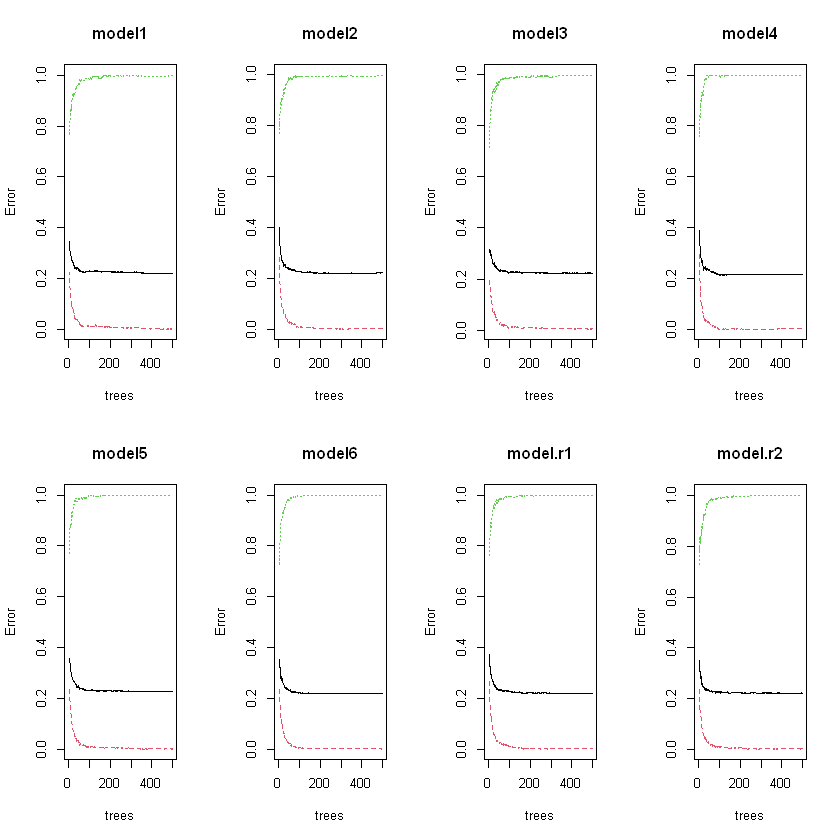

In [9]:
par(mfrow = c(2,4))
plot(model1)
plot(model2)
plot(model3)
plot(model4)
plot(model5)
plot(model6)
plot(model.r1)
plot(model.r2)

# 5. Analysis
## 5.1. Measurement

To evaluate the performance of random forest classification, this paper selected three criteria: false positive rate, true positive rate and area under the curve. **False Positive Rate**(FPR) is defined as the portion of being incorrectly assigned as positive but actually negative. On the other hand, **True Positive Rate**(TPR) which is known as sensitivity, indicates the portion of being detected as positive when it is actually positive. The curve with y-axis of TPR and x-axis of FPR is called **ROC curve** and the two-dimensional area underneath the entire ROC curve is defined as **Area Under the ROC curve**(AUC). The higher AUC means higher performance of a model because it means TPR of the model which means the ratio of conducting correct classification is more frequent than incorrect classification(FPR).

**Table 2. Performance Measurement**

| Measurement | Description |
|-------------|:-------------:|
|False Positive Rate | $\frac{FP}{FP+TN}$|
|True Positive Rate | $\frac{TP}{TP+FN}$|
|ROC Curve | y: TPR, x: FPR|
|Area Under the ROC curve | the scale of area under the ROC curve|

## 5.2. False Positive Rate and True Positive Rate

The Figure 2 shows FPR and TPR value of random forest and logistic regression with baseline sample respectively. It manifests that the logistic regression performs better than random forest when it comes to those values. In detail, logistic regression has smaller case of incorrect classification and shows remarkably better performance in correct classification than random forest.

**Figure 2. Group1: Basline Model**

| Baseline FPR | Baseline TPR|
:----:|:---:
<img src="figure/baseline_comparison_fpr.png" width="300" height="100" ><br>|<img src="figure/baseline_comparison_tpr.png" width="300" height="100" ><br>

The second group is the sample with adjustment in explanatory variables. According to the level of mean decrease in Gini Coefficient, the first sample in this group removed 5 explanatory varibles:*WTRINHERITANCE, fourormorechild, healthins, finance* and *manager*. *WTRINTERITANCE* is a dummy variable of 1 if the household has received an inheritance; *fourormorechild* is also a dummy variable of 1 if the household has four or more children; *healthins* indicates if the household has health insurance; *finance* is 1 if the household is employed in the financial sector; *manager* is 1 if the household is employed in a managerial position and zero otherwise. In the second sample in this group, four more explanatory variables are removed, which are, *regionN, unemphd, onechild* and *threechild*. *RegionN* is a proxy for the household locating in North region and *unemphd* is 1 if the household is unemployed. The result in Figure 3 shows that logistic regression showed better performance across the both samples. However, as the explanatory variables are removed, the difference in performance measurement decreased, in particularly, FPR value in the second sample returns similar value.

**Figure 3. Group 2: Changes in Explanatory Variables**

| Group 2 FPR | Group 2 TPR|
:----:|:---:
<img src="figure/explanatory_comparison_fpr.png" width="300" height="100" ><br>|<img src="figure/explanatory_comparison_tpr.png" width="300" height="100" ><br>

The third group consists of the samples with different sample size. FPR values were remained between 0.4 to 0.6 across samples and models and logistic model shows lower FPR over the samples which means it reached superior performance. Regaring to TPR, while resultant mean value of random forest model remained between 0.3 to 0.5, logistic model caused outcome between 0.5 to 0.6 which dominated random forest model. Therefore, in this group also showed that logistic model performed better but as the sample size increases, the performance gap was alleviated.

**Figure 4. Group 3: Changes in Sample Size**

| Group 3 FPR | Group 3 TPR|
:----:|:---:
<img src="figure/samplesize_comparison_fpr.png" width="300" height="100" ><br>|<img src="figure/samplesize_comparison_tpr.png" width="300" height="100" ><br>

In the fourth group, new control variables were added which are dummy variable of risk preference level and the second sample of this group went through removal of 5 explanatory variables of the least mean decrease in Gini coefficient. To compare the second sample of this group with the previous sample with removal of 5 explanatory variables, the one with new control variables returns greater gap between FPR of two models. As like in the previous group, this group also manifested superior performance of logistic model over random forest.

**Figure 5. Group 4: Addition of Risk Control Variables**

| Group 4 FPR | Group 4 TPR|
:----:|:---:
<img src="figure/riskgrp_comparison_fpr.png" width="300" height="100" ><br>|<img src="figure/riskgrp_comparison_tpr.png" width="300" height="100" ><br>

## 5.3. ROC Curve and AUC

Figure 6 display the comparison of performance of two models in more readable way. There is a 45 radius line across the grid which is $TPR(y) = FPR(x)$ The orange line represents random forest model and its ROC curve mostly underneath the diagonal line. This means the random forest returns more cases of false classification than correct classification. 

**Figure 6. ROC Curves**

| | | | |
:-:|:-:|:-:|:-:
Baseline | Group 2 | Group 2 | Group 3
<img src="figure/ROC1.baseline.png" width="300" height="100" ><br>|<img src="figure/ROC2.explanatory1.png" width="300" height="100" ><br>|<img src="figure/ROC2.explanatory2.png" width="300" height="100" ><br>|<img src="figure/ROC3.samplesize1.png" width="300" height="100" ><br>  
Group 3 | Group 3 | Group 4| Group4  
<img src="figure/ROC3.samplesize2.png" width="300" height="100" ><br>|<img src="figure/ROC3.samplesize3.png" width="300" height="100" ><br>|<img src="figure/ROC4.risk1.png" width="300" height="100" ><br>|<img src="figure/ROC4.risk2.png" width="300" height="100" ><br>


To see detailed comparison, AUC values are suggested in Table 3. The higher AUC value means greater area under the ROC curve which means there are more case included in $TPR(y) > FPR(x)$. Therefore, the higher AUC value indicates better performance of the model. The sample with the highest AUC is **Small Sample** of Group 2. It returns approximately 0.62 of AUC. On the other hand, the lowest AUC was found in **Explanatory Sample 1** whose AUC is approximately 0.452. Group 2 suggest that how the performance changes according to the sample size. In random forest model, the value changes 0.453, 0.456(baseline), 0.482, 0.453. Although it shows drop in AUC in the largest sample, in general it indicates better performance as the sample size grows.

**Table 3. AUC Values**

| Group | Sample | Model | AUC|  
|-------|:--------|:-------|:----|  
|Group1 |Baseline Sample| Random Forest | 0.4562074|  
| | |Logistic Regression | 0.5966265|  
|Group2 | Explanatory Sample 1 | Random Forest | 0.4521052|  
|       | |Logistic Regression | 0.5889017|  
|        | Explanatory Sample 2 | Random Forest | 0.5024365|  
|        | |Logistic Regression | 0.5863805|  
|Group3 | Small Sample | Random Forest | 0.4532764|  
|       | |Logistic Regression | 0.6241219|  
|       | Medium Sample | Random Forest | 0.4819982|  
|       | |Logistic Regression | 0.5825306 |  
|       | Large Sample | Random Forest | 0.4529289|  
|       | |Logistic Regression | 0.5713568 |  
|Group 4| Risk Sample 1 | Random Forest | 0.4539569|  
|       | |Logistic Regression | 0.5966265 |  
|      | Risk Sample 2 | Random Forest | 0.4723596|  
|      | |Logistic Regression | 0.5966265|  

In [10]:
model.to.auc <-function(model, trainset, Y){
    pred1=predict(model,type = "prob")

    perf = prediction(pred1[,2], trainset$Y)
    pred = performance(perf, "auc")
    
    df.auc <-data.frame(auc =pred@y.values)
    colnames(df.auc) <-c('auc')

    return(df.auc[[1]])
}

#auc
lm.to.auc <-function(logit.model, trainset, Y){
    logit.pred1=predict(logit.model, type = "response")

    logit.perf = prediction(logit.pred1, trainset$Y)
    logit.pred = performance(logit.perf, "auc")

    df.auc <-data.frame(auc =logit.pred@y.values)
    colnames(df.auc) <-c('auc')
    df.auc

    return(df.auc[[1]])
}

In [11]:
#auc: logisitc regression
data.frame(auc = c(lm.to.auc(lm1,trainset,Y),
lm.to.auc(lm2,trainset2,Y),
lm.to.auc(lm3,trainset3,Y),
lm.to.auc(lm4,trainset.s,Y),
lm.to.auc(lm5,trainset.m,Y),
lm.to.auc(lm6,trainset.l,Y),
lm.to.auc(lm.r1,trainset.r1,Y),
lm.to.auc(lm.r2,trainset.r2,Y)))

#auc: Rf
data.frame(auc = c(model.to.auc(model1,trainset,Y),
model.to.auc(model2,trainset2,Y),
model.to.auc(model3,trainset3,Y),
model.to.auc(model4,trainset.s,Y),
model.to.auc(model5,trainset.m,Y),
model.to.auc(model6,trainset.l,Y),
model.to.auc(model.r1,trainset.r1,Y),
model.to.auc(model.r2,trainset.r2,Y)))

auc
<dbl>
0.5966265
0.5889017
0.5863805
0.6149022
0.5742981
0.5724796
0.5966265
0.5966265


auc
<dbl>
0.4735355
0.4676355
0.4968609
0.4408953
0.4464721
0.4425022
0.4892476
0.4876171


# 6. Conclusion

This paper has its value in comparing the classification performance of two different methods: random forest and logistic regression. The measurement tools are FPR, TPR and AUC. The main analysis was conducted over 8 different samples with changes in the number of explanatory variables, sample size and addition of new variables.Across the sample sets, performance of logistic regression dominated performance of random forest regarding to both FPR and TPR. Removal of less important explanatory variables and increase in the number of sample size reduced performance gap between two models.

ROC curve has TPR as y-axis and FPR as x-axis like Figure 6 and the 45 degree line is where TPR = FPR. Therefore, if a ROC curve has more points where TPR is greater than FPR, the AUC value becomes greater. While the largest auc of random forest is 0.502 of Explanatory Sample 2 in Group 2 at Table 3, the least auc of logistic regression model is 0.571 in Large Sample in Group 3 at Table 3. It implies that logistic regression performs better than random forest regardless of sample set.

This study might suggest the well-know disadvantage of non parametric model which is not suitable for data where parametric test is valid. There is possibility that random forest cannot outperform logistic regression because each variable satisfies assumed distribution. If so, it postulates that the performance gap with panel data might be greater than the one measured in this study. This study used a static sample with year$= 1999$ of panel data to control disadvantage on random forest due to dynamics. Therefore, this is open question that performance of the two models in panel data.

# Reference

[1] Biau, G., & Scornet, E. (2016). A random forest guided tour. Test, 25(2), 197-227.

[2]Bogan, V. L., & Fernandez, J. M. (2017). How children with mental disabilities affect household investment decisions. American Economic Review, 107(5), 536-40.

[3] Kirasich, K., Smith, T., & Sadler, B. (2018). Random forest vs logistic regression: binary classification for heterogeneous datasets. SMU Data Science Review, 1(3), 9.

[4] Janys, L. (2022). Computational Statistics. https://github.com/LJanys/CompStat

[5] Luo, H., Pan, X., Wang, Q., Ye, S., & Qian, Y. (2019, July). Logistic regression and random forest for effective imbalanced classification. In 2019 IEEE 43rd Annual Computer Software and Applications Conference (COMPSAC) (Vol. 1, pp. 916-917). IEEE.

[6] Shah, K., Patel, H., Sanghvi, D., & Shah, M. (2020). A comparative analysis of logistic regression, random forest and KNN models for the text classification. Augmented Human Research, 5(1), 1-16.
